In [1]:
import scipy.misc 
from scipy import io
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
rcParams["figure.figsize"]= 10,5
%matplotlib inline
Data_mat = scipy.io.loadmat('data3.mat')
Data_mat
data = pd.DataFrame(Data_mat['data'])
data
dataset=data
X=dataset.iloc[:,:2].to_numpy()
y=data.iloc[:,2:].to_numpy()




In [2]:
def predict(X):
    return np.where(X>=0, 1, -1)
        
def fit(X, Y,epoch, eta):
    n_samples, n_features = X.shape
    global weights
    weights= np.zeros(n_features)
    global bias
    bias= 0
    perceptron_loss = np.zeros(epoch)
    binary_loss = np.zeros(epoch)
    for i in range(epoch):
        for index, x in enumerate(X):
            output = np.dot(x, weights) + bias
            y_predicted = predict(output)
            if y[index]*y_predicted <= 0:
                perceptron_loss[i] += (Y[index]*(np.dot(X[index], weights) + bias))
                binary_loss[i] += np.heaviside(((np.dot(X[index],weights) + bias) * Y[index])*-1,-1)
                update_weights = eta * (Y[index] - y_predicted)
                weights += update_weights * x
                bias += update_weights
           
            
        
    return (-1*perceptron_loss)/len(X), binary_loss/len(X)
    
def plot_boundary(weights,bias):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    plt.scatter(X[:,0],X[:,1],marker='+',c=y)

    features0_1=np.amin(X[:,0])
    features0_2=np.amax(X[:,0])

    features1_1=(-weights[0]*features0_1-bias)/weights[1]
    features1_2=(-weights[0]*features0_2-bias)/weights[1]

    ax.plot([features0_1,features0_2],[features1_1,features1_2], color='red')
    plt.title("Decision Boundary")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    return
 
def plot_perceptron_loss():
    fig = plt.figure()
    epochs = np.arange(1,501)
    plt.plot(epochs, error,color='green')
    plt.title("Perceptron Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    return
    
def plot_binary_loss():
    fig = plt.figure()
    epochs = np.arange(1,501)
    plt.plot(epochs, binary_miss_error,color='green')
    plt.title("Binary Misclassification")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    return


        
        


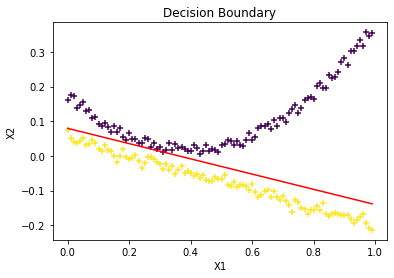

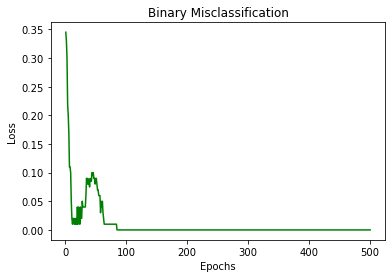

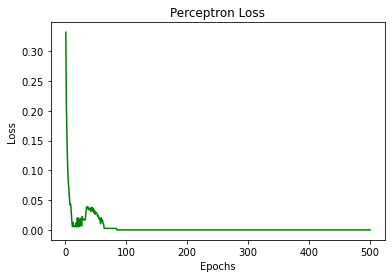

In [3]:
error, binary_miss_error = fit(X,y,epoch=500,eta=1)
plot_boundary(weights,bias)
plot_binary_loss()
plot_perceptron_loss()